In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.1 Load the Data


In [ ]:
# Load the dataset
df=pd.read_csv('insurance_claims.csv')

In [ ]:
# Check at the first few entries
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
# Inspect the shape of the dataset
df.shape

(1000, 40)

In [ ]:
# Inspect the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

2. Data Cleaning


2.1 Handle null values


2.1.1 Examine the columns to determine if any value or column needs to be treated


In [ ]:
# Check the number of missing values in each column
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


Inference: The columns 'authorities_contacted' and '_c39' has null values present in it


2.1.2 Handle rows containing null values


In [ ]:
# Handle the rows containing null values
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


In [ ]:
# Imputing the column authorities_contacted with its mode
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

2.2 Identify and handle redundant values and columns

2.2.1 Examine the columns to determine if any value or column needs to be treated


In [ ]:
# Write code to display all the columns with their unique values and counts and check for redundant values
unique_values_info = pd.DataFrame({
 "Unique_Count": df.nunique(),
 "Sample_Unique_Values": df.apply(lambda x: x.unique()[:5])
 })
unique_values_info

,Unique_Count,Sample_Unique_Values
months_as_customer,391,"[328, 228, 134, 256, 137]"
age,46,"[48, 42, 29, 41, 44]"
policy_number,1000,"[521585, 342868, 687698, 227811, 367455]"
policy_bind_date,951,"[17-10-2014, 27-06-2006, 06-09-2000, 25-05-199..."
policy_state,3,"[OH, IN, IL]"
policy_csl,3,"[250/500, 100/300, 500/1000]"
policy_deductable,3,"[1000, 2000, 500]"
policy_annual_premium,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91]"
umbrella_limit,11,"[0, 5000000, 6000000, 4000000, 3000000]"
insured_zip,995,"[466132, 468176, 430632, 608117, 610706]"


In [ ]:
# columns identified with invalid entries to be treated
cols_to_clean = ['collision_type', 'property_damage', 'police_report_available']
df[cols_to_clean] = df[cols_to_clean].replace('?', 'UNKNOWN')
unique_values_info = pd.DataFrame({
 "Unique_Count": df.nunique(),
 "Sample_Unique_Values": df.apply(lambda x: x.unique()[:5])
 })
unique_values_info

,Unique_Count,Sample_Unique_Values
months_as_customer,391,"[328, 228, 134, 256, 137]"
age,46,"[48, 42, 29, 41, 44]"
policy_number,1000,"[521585, 342868, 687698, 227811, 367455]"
policy_bind_date,951,"[17-10-2014, 27-06-2006, 06-09-2000, 25-05-199..."
policy_state,3,"[OH, IN, IL]"
policy_csl,3,"[250/500, 100/300, 500/1000]"
policy_deductable,3,"[1000, 2000, 500]"
policy_annual_premium,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91]"
umbrella_limit,11,"[0, 5000000, 6000000, 4000000, 3000000]"
insured_zip,995,"[466132, 468176, 430632, 608117, 610706]"


Inference:
1.The column '_c39' is completely empty.
2.'collision_type', 'property_damage', 'police_report_available' has some huge invalid missing values which is now replaced with 'Unknown' for better analysis instead of dropping

In [ ]:
# Identify and drop any columns that are completely empty
df.drop(columns='_c39',inplace=True)

2.2.3 Identify and drop rows where features have illogical or invalid values, such as negative values for features that should only have positive values

In [ ]:
# Identify and drop rows where features have illogical or invalid values, such as negative values for features that should only have positive values

# Extract only the numerical columns and view the values
num_col=df.select_dtypes(include=['number'])
num_col.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
num_col=list(num_col.columns)
num_col

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [ ]:
# Rows that has invalid/negative values
invalid_row_col=[col for col in num_col if (df[col]<0).any()]
invalid_row_col

['umbrella_limit', 'capital-loss']

In [ ]:
# Removing the rows that has negative values
df=df[~(df['umbrella_limit']<0)]

In [ ]:
df.shape

(999, 39)

Inference:

From the output of num_col.describe(), we observe that the column 'umbrella_limit' has a maximum value of 10,000,000, but also contains an incorrect value of -1,000,000. It's advisable to remove this erroneous entry as it may skew the analysis.
The column 'capital-loss also has negative values but it is a valid value according to the definition.

2.2.4 Identify and remove columns where a large proportion of the values are unique or near-unique, as these columns are likely to be identifiers or have very limited predictive power


In [ ]:
# Identify and remove columns that are likely to be identifiers or have very limited predictive power
df.nunique()

,0
months_as_customer,391
age,46
policy_number,999
policy_bind_date,950
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,990
umbrella_limit,10
insured_zip,994


In [ ]:
# Check the dataset
df = df.drop(columns=['policy_number','insured_zip','incident_location'])

In [ ]:
df.shape

(999, 36)

2.3 Fix Data Types



In [ ]:
# Fix the data types of the columns with incorrect data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_bind_date             999 non-null    object 
 3   policy_state                 999 non-null    object 
 4   policy_csl                   999 non-null    object 
 5   policy_deductable            999 non-null    int64  
 6   policy_annual_premium        999 non-null    float64
 7   umbrella_limit               999 non-null    int64  
 8   insured_sex                  999 non-null    object 
 9   insured_education_level      999 non-null    object 
 10  insured_occupation           999 non-null    object 
 11  insured_hobbies              999 non-null    object 
 12  insured_relationship         999 non-null    object 
 13  capital-gains            

In [ ]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [ ]:
# Check the features of the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           999 non-null    int64         
 1   age                          999 non-null    int64         
 2   policy_bind_date             999 non-null    datetime64[ns]
 3   policy_state                 999 non-null    object        
 4   policy_csl                   999 non-null    object        
 5   policy_deductable            999 non-null    int64         
 6   policy_annual_premium        999 non-null    float64       
 7   umbrella_limit               999 non-null    int64         
 8   insured_sex                  999 non-null    object        
 9   insured_education_level      999 non-null    object        
 10  insured_occupation           999 non-null    object        
 11  insured_hobbies              999 non-null    objec

In [ ]:
3. Train-Validation Spli

3.1 Import required libraries

In [ ]:
# Import train-test-split
from sklearn.model_selection import train_test_split

In [ ]:
3.2 Define feature and target variables

In [ ]:
# Put all the feature variables in X
X=df.drop(columns=['fraud_reported'])
# Put the target variable in y
y=df['fraud_reported']

Split the data

In [ ]:
# Split the dataset into 70% train and 30% validation and use stratification on the target variable
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)
# Reset index for all train and test sets
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


In [ ]:
#verifying class balance in train and validation sets after stratification
print("Train set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nValidation set class distribution:")
print(y_val.value_counts(normalize=True))

Train set class distribution:
fraud_reported
N    0.752504
Y    0.247496
Name: proportion, dtype: float64

Validation set class distribution:
fraud_reported
N    0.753333
Y    0.246667
Name: proportion, dtype: float64


EDA on training data

4.1 Perform univariate analysi

4.1.1 Identify and select numerical columns from training data for univariate analysis


In [ ]:
# Select numerical columns
num_col=X_train.select_dtypes(include='int64')
num_col.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

4.1.2 Visualise the distribution of selected numerical features using appropriate plots to understand their characteristics [
  

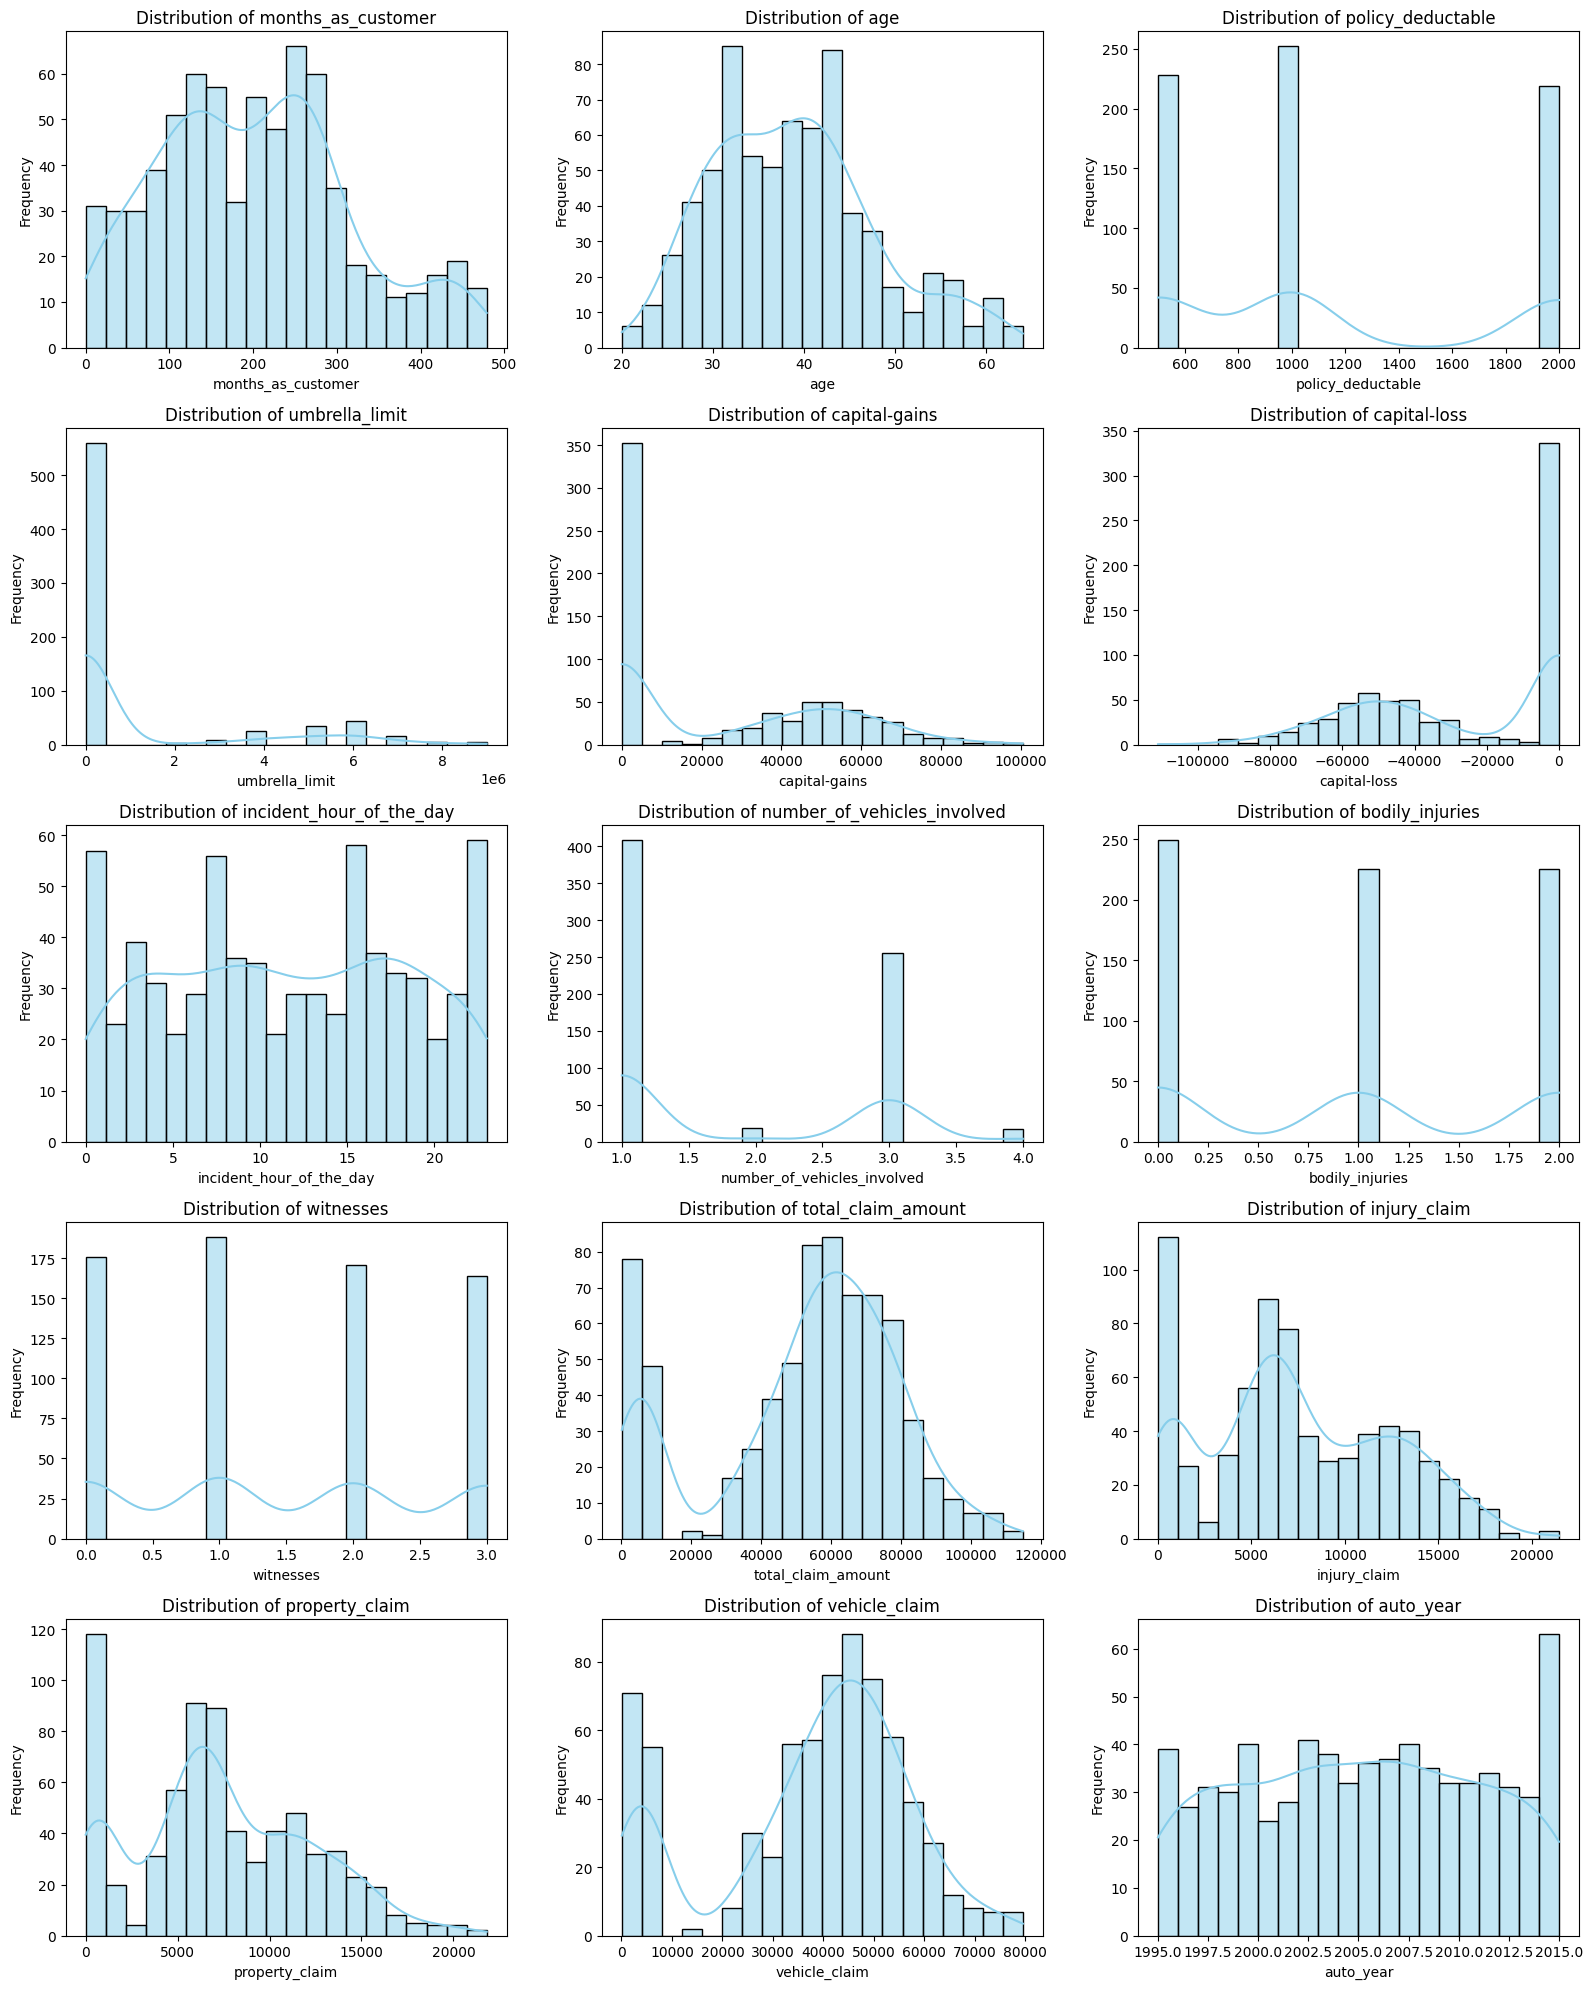

In [ ]:
# Plot all the numerical columns to understand their distribution

# Set up the plot grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
axes = axes.flatten()

for i, column in enumerate(num_col):
    sns.histplot(X_train[column], kde=True, ax=axes[i], bins=20, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Perform correlation analysis


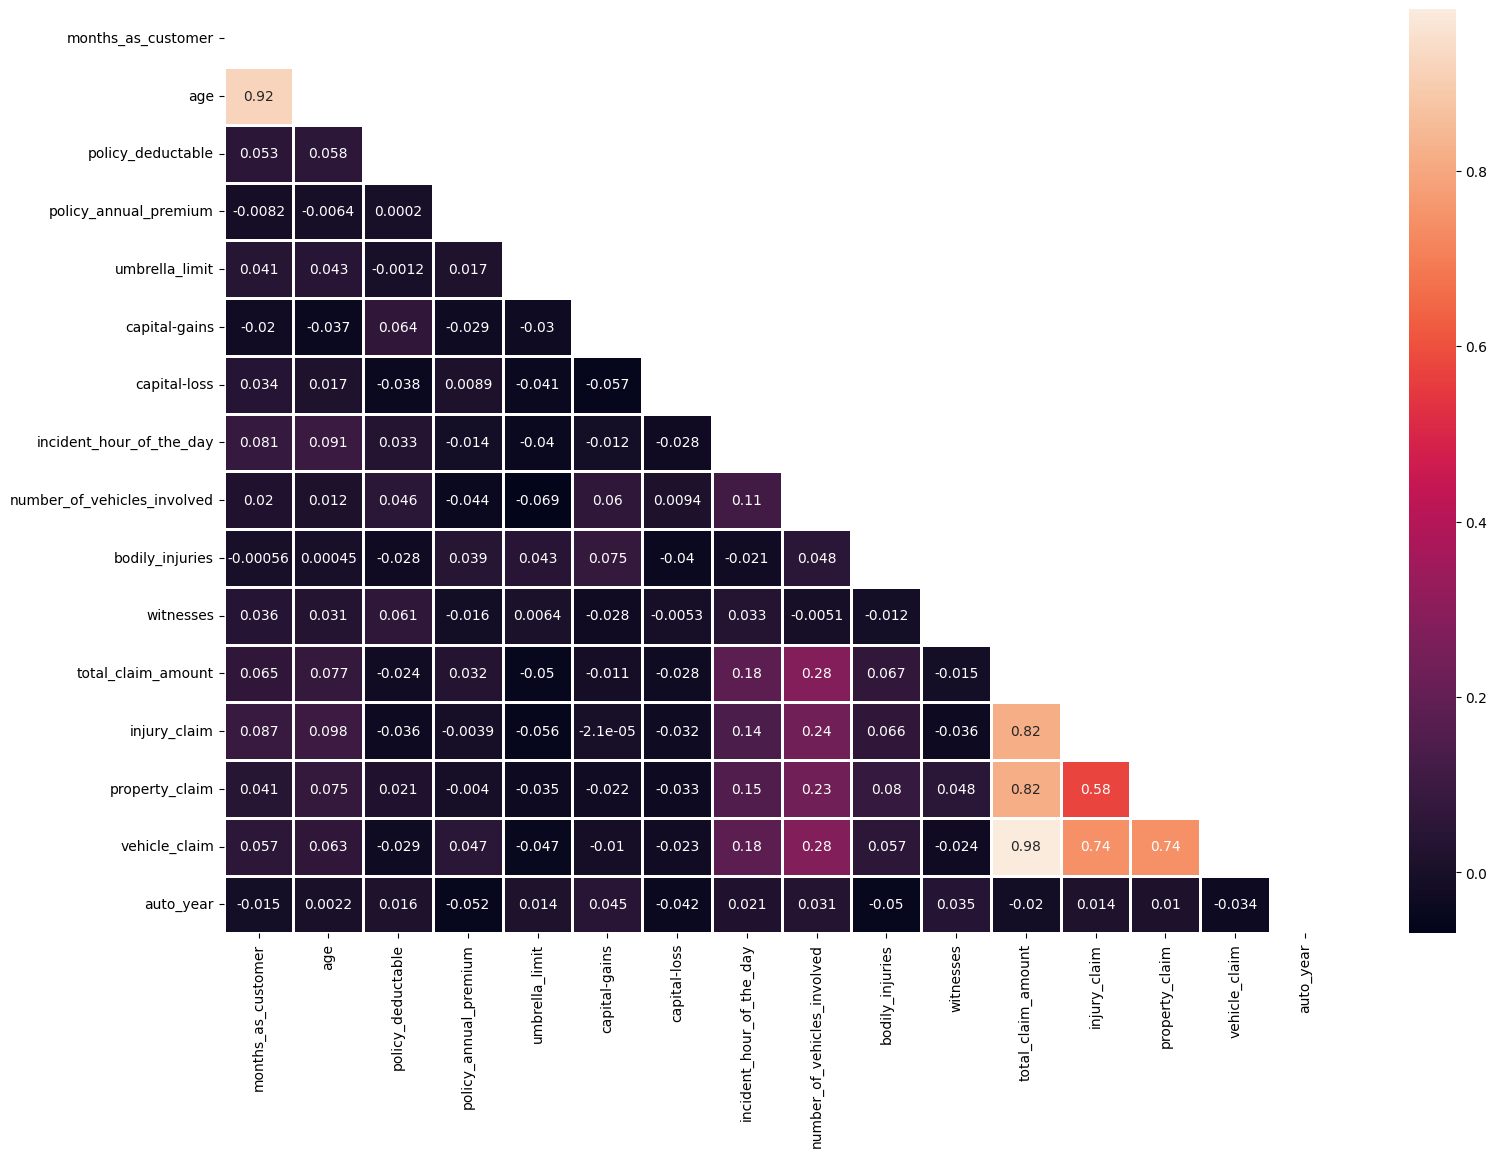

In [ ]:
# Create correlation matrix for numerical columns
corr = (X_train.select_dtypes(include='number')).corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1, mask= np.triu(np.ones_like(corr, dtype = bool)))
plt.show()

Perform bivariate analysis


In [ ]:
# Write a function to calculate and analyse the target variable likelihood for categorical features

def target_likelihood(X_train, target_col='fraud_reported', positive_class='Y'):
    cat_col = X_train.select_dtypes(include='object').columns
    cat_col = [col for col in cat_col if col != target_col]

    for col in cat_col:
        likelihood = (
            df.groupby(col)[target_col]
            .apply(lambda x: (x == positive_class).mean())
            .reset_index(name='target_likelihood')
        )

        print(f"\033[1m\n--> Feature: {col}\033[0m")
        print(likelihood.sort_values(by='target_likelihood', ascending=False).to_string(index=False))

    return

Feature Engineering


In [ ]:
# Import RandomOverSampler from imblearn library
from imblearn.over_sampling import RandomOverSampler

# Perform resampling on training data
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

1052

Feature Creation


In [ ]:
# Create new features based on your understanding for both training and validation data

# Extracting year and month data from Policy_bind_date on both training and validation data
X_resampled_os['policy_bind_year']=pd.to_datetime(X_resampled_os['policy_bind_date']).dt.year
X_resampled_os['policy_bind_month']=pd.to_datetime(X_resampled_os['policy_bind_date']).dt.month

X_val['policy_bind_year']=pd.to_datetime(X_val['policy_bind_date']).dt.year
X_val['policy_bind_month']=pd.to_datetime(X_val['policy_bind_date']).dt.month

In [ ]:
# Binning according to the time period of the day in training data
bins = [-1, 3, 6, 9, 12, 17, 20, 24]
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
X_resampled_os['incident_period_of_day'] = pd.cut(X_resampled_os.incident_hour_of_the_day, bins, labels=names).astype(object)

# Binning according to the time period of the day in validation data
bins = [-1, 3, 6, 9, 12, 17, 20, 24]
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
X_val['incident_period_of_day'] = pd.cut(X_val.incident_hour_of_the_day, bins, labels=names).astype(object)
X_val[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,23,night
1,7,morning
2,18,evening
3,23,night
4,17,afternoon
5,23,night
6,9,morning
7,16,afternoon
8,20,evening
9,6,early_morning


Combine values in Categorical Columns

In [ ]:
cat_cols=X_resampled_os.select_dtypes(include='object')

In [ ]:
# Defining a function to list out unique values and their counts in each column
def get_unique_value_counts(X_resampled_os, cat_cols):
    records = []

    for col in cat_cols:
        value_counts = X_resampled_os[col].value_counts()
        for val, count in value_counts.items():
            records.append({
                'Column': col,
                'Category': val,
                'Count': count
            })

    return pd.DataFrame(records).sort_values(by=['Column', 'Count'], ascending=[True, False])
pd.set_option('display.max_rows', None)
get_unique_value_counts(X_resampled_os, cat_cols)

,Column,Category,Count
67,authorities_contacted,Police,352
68,authorities_contacted,Fire,246
69,authorities_contacted,Ambulance,228
70,authorities_contacted,Other,226
91,auto_make,Ford,89
92,auto_make,Suburu,87
93,auto_make,Audi,87
94,auto_make,BMW,86
95,auto_make,Mercedes,83
96,auto_make,Chevrolet,82


# New Section

In [ ]:
# Import libraries or function to plot the ROC curve
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None